<a href="https://colab.research.google.com/github/IsaacEmerick/GS_SUB_IA/blob/main/GS_SUB_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configurar visualizações no notebook
%matplotlib inline

In [ ]:
from google.colab import files

# Depois de fazer o upload, carregar o dataset
df = pd.read_csv('station_data_dataverse.csv')

In [ ]:
df.head()

,sessionId,kwhTotal,dollars,created,ended,startTime,endTime,chargeTimeHrs,weekday,platform,...,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
0,1366563,7.78,0.00,0014-11-18 15:40:26,0014-11-18 17:11:04,15,17,1.510556,Tue,android,...,0,3,0,1,0,0,0,0,0,0
1,3075723,9.74,0.00,0014-11-19 17:40:26,0014-11-19 19:51:04,17,19,2.177222,Wed,android,...,0,3,0,0,1,0,0,0,0,0
2,4228788,6.76,0.58,0014-11-21 12:05:46,0014-11-21 16:46:04,12,16,4.671667,Fri,android,...,0,3,0,0,0,0,1,0,0,0
3,3173284,6.17,0.00,0014-12-03 19:16:12,0014-12-03 21:02:18,19,21,1.768333,Wed,android,...,0,3,0,0,1,0,0,0,0,0
4,3266500,0.93,0.00,0014-12-11 20:56:11,0014-12-11 21:14:06,20,21,0.298611,Thu,android,...,0,3,0,0,0,1,0,0,0,0


In [ ]:
df.isnull().sum()

,0
sessionId,0
kwhTotal,0
dollars,0
created,0
ended,0
startTime,0
endTime,0
chargeTimeHrs,0
weekday,0
platform,0


In [ ]:
df.describe()

,sessionId,kwhTotal,dollars,startTime,endTime,chargeTimeHrs,distance,userId,stationId,locationId,managerVehicle,facilityType,Mon,Tues,Wed,Thurs,Fri,Sat,Sun,reportedZip
count,3.395000e+03,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,2330.000000,3.395000e+03,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000,3395.000000
mean,5.487001e+06,5.809629,0.118268,13.743446,16.455965,2.841488,18.652378,5.742395e+07,576789.678056,629934.460677,0.595582,2.428571,0.181443,0.187040,0.210015,0.216495,0.179676,0.018262,0.007069,0.703976
std,2.590657e+06,2.892727,0.492562,3.204370,3.406732,1.507472,11.420571,2.674772e+07,257486.310402,255620.993849,0.490851,0.811204,0.385442,0.390001,0.407379,0.411916,0.383974,0.133918,0.083793,0.456569
min,1.004821e+06,0.000000,0.000000,0.000000,0.000000,0.012500,0.856911,1.042767e+07,129465.000000,125372.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.234666e+06,4.350000,0.000000,11.000000,14.000000,2.110278,5.135871,3.329548e+07,369001.000000,481066.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.451498e+06,6.230000,0.000000,13.000000,16.000000,2.808889,21.023826,4.924181e+07,549414.000000,503205.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,7.746644e+06,6.830000,0.000000,17.000000,20.000000,3.544167,27.285053,8.188052e+07,864630.000000,878393.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.998981e+06,23.680000,7.500000,23.000000,23.000000,55.238056,43.059292,9.834581e+07,995505.000000,978130.000000,1.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Exemplo: Remover linhas com valores nulos
df.dropna(inplace=True)

In [ ]:
df['created'] = pd.to_datetime(df['created'], format='00%y-%m-%d %H:%M:%S')
df['ended'] = pd.to_datetime(df['ended'], format='00%y-%m-%d %H:%M:%S')

In [ ]:
df['created_hour'] = df['created'].dt.hour
df['created_day'] = df['created'].dt.day
df['created_month'] = df['created'].dt.month
df['created_weekday'] = df['created'].dt.dayofweek

In [ ]:
df['platform'] = df['platform'].map({'Android': 0, 'IOS': 1})

In [ ]:
df['facilityType'] = df['facilityType'].astype(int)

In [ ]:
df.drop(['sessionId', 'userId', 'stationId', 'locationId', 'reportedZip'], axis=1, inplace=True)

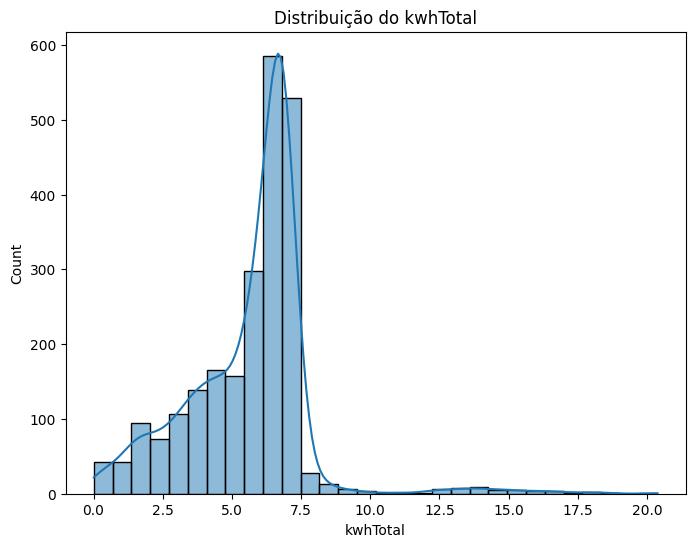

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(df['kwhTotal'], bins=30, kde=True)
plt.title('Distribuição do kwhTotal')
plt.show()

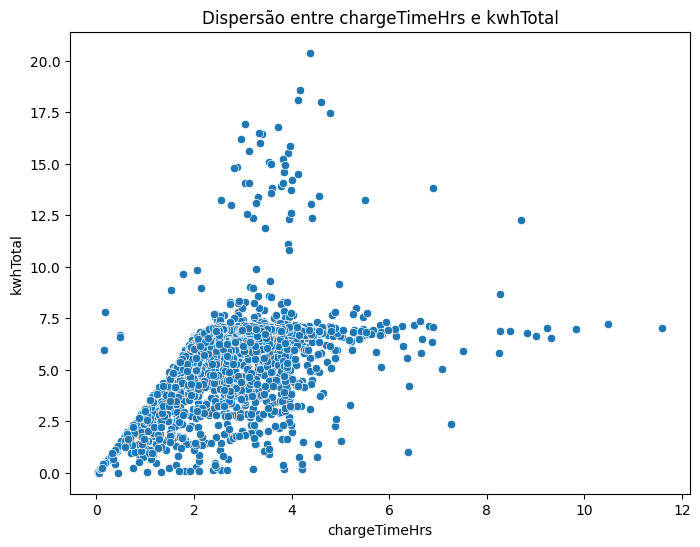

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='chargeTimeHrs', y='kwhTotal', data=df)
plt.title('Dispersão entre chargeTimeHrs e kwhTotal')
plt.show()

In [ ]:
# Criar um dicionário de mapeamento
dias_semana = {'Mon': 0, 'Tue': 1, 'Wed': 2, 'Thu': 3, 'Fri': 4, 'Sat': 5, 'Sun': 6}

# Aplicar o mapeamento à coluna 'weekday'
df['weekday'] = df['weekday'].map(dias_semana)

In [ ]:
plataformas = {'Android': 0, 'IOS': 1}
df['platform'] = df['platform'].map(plataformas)

In [ ]:
X = df.drop('kwhTotal', axis=1)
y = df['kwhTotal']

In [ ]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Listar colunas com tipo datetime64
datetime_cols = X.select_dtypes(include=['datetime64[ns]']).columns.tolist()
print("Colunas com tipo datetime64:", datetime_cols)

Colunas com tipo datetime64: ['created', 'ended']


In [ ]:
for col in datetime_cols:
    X[col + '_hour'] = X[col].dt.hour
    X[col + '_day'] = X[col].dt.day
    X[col + '_month'] = X[col].dt.month
    X[col + '_weekday'] = X[col].dt.dayofweek  # 0 = segunda-feira

In [ ]:
X = X.drop(columns=datetime_cols)

In [ ]:
non_numeric_cols = X.select_dtypes(exclude=[np.number]).columns.tolist()
print("Colunas não numéricas em X:", non_numeric_cols)

Colunas não numéricas em X: []


In [ ]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestRegressor

modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X_treino, y_treino)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred = modelo.predict(X_teste)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_teste, y_pred)
mse = mean_squared_error(y_teste, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_teste, y_pred)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

MAE: 0.84
MSE: 1.58
RMSE: 1.26
R²: 0.62


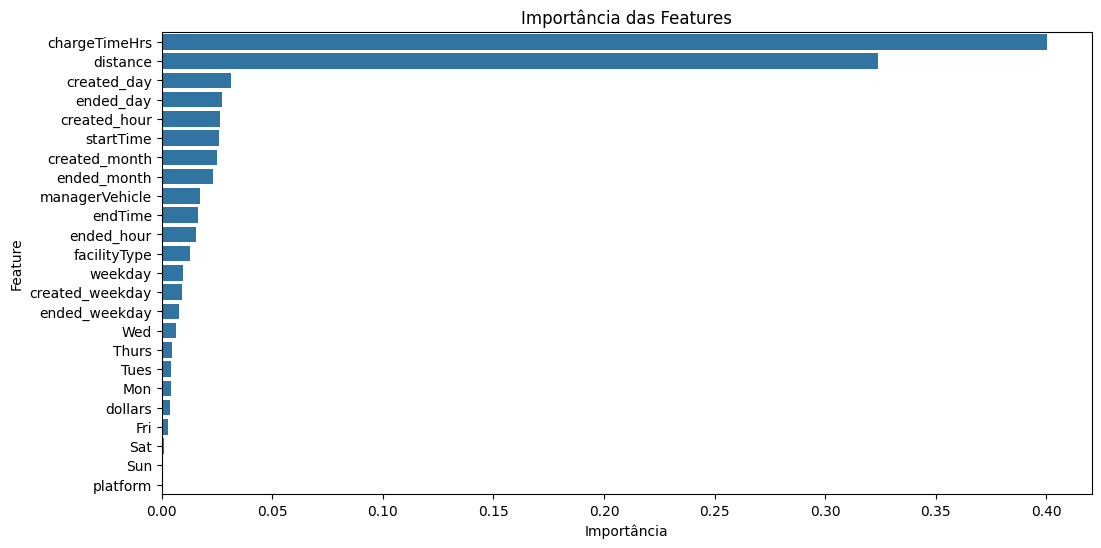

In [ ]:
importancias = modelo.feature_importances_
features = X.columns
df_importancia = pd.DataFrame({'Feature': features, 'Importância': importancias})
df_importancia.sort_values('Importância', ascending=False, inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(x='Importância', y='Feature', data=df_importancia)
plt.title('Importância das Features')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=parametros,
                           cv=3,
                           n_jobs=-1,
                           scoring='neg_mean_squared_error')

grid_search.fit(X_treino, y_treino)

melhor_modelo = grid_search.best_estimator_

print(f'Melhores parâmetros: {grid_search.best_params_}')

Melhores parâmetros: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}


In [ ]:
y_pred_melhor = melhor_modelo.predict(X_teste)

mae = mean_absolute_error(y_teste, y_pred_melhor)
mse = mean_squared_error(y_teste, y_pred_melhor)
rmse = np.sqrt(mse)
r2 = r2_score(y_teste, y_pred_melhor)

print(f'MAE: {mae:.2f}')
print(f'MSE: {mse:.2f}')
print(f'RMSE: {rmse:.2f}')
print(f'R²: {r2:.2f}')

media_kwh = df['kwhTotal'].mean()
desvio_padrao_kwh = df['kwhTotal'].std()
print(f"Média de kwhTotal: {media_kwh:.2f}")
print(f"Desvio padrão de kwhTotal: {desvio_padrao_kwh:.2f}")

MAE: 0.85
MSE: 1.54
RMSE: 1.24
R²: 0.63
Média de kwhTotal: 5.62
Desvio padrão de kwhTotal: 2.23
